# Project: No-show appointments

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
<li><a href="#limitations">limitations</a></li>    
</ul>

<a id='intro'></a>
## Introduction
In this project we will analyzing data that contains medical appointments in Brazil and we will focus to answer that question What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?,And we'll be interested in finding trends among the patients who show and how they differed from the patients who didn't.
let's jump in.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
from statistics import mean
from operator import itemgetter

<a id='wrangling'></a>
## Data Wrangling
### General Properties

#### Loading our dataset

In [2]:
df=pd.read_csv('Database_No_show_appointments/noshowappointments-kagglev2-may-2016.csv')
df.head(3)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No


#### Display how many sampels and columns we have in our dataset

In [3]:
df.shape

(110527, 14)

#### Summary statistics about dataset  

In [4]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


#### Check if we have any missing values or wrong datatypes

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


#### check if w have duplicates values

In [6]:
df.duplicated().sum()

0

#### We noticed the minimum of age column is -1 and that isn't make sense,So we need to know in what index we could find it

In [7]:
df.Age.idxmin()

99832


### Data Cleaning

#### Remove columns which we will not use in our analysis 

In [8]:
df.drop(['PatientId','AppointmentID'],axis=1,inplace=True)

#### Rename columns to be more consistent

In [9]:
df.rename(columns= lambda x: x.lower(),inplace=True)
df.rename(columns={'no-show':'no_show'},inplace=True)

#### Remove index which has negative value in age column

In [10]:
df.drop(index=99832,inplace=True)

#### Convert datatype of scheduledday and appointmentday from object to datetime

In [11]:
df['scheduledday']=pd.to_datetime(df['scheduledday'])
df['appointmentday']=pd.to_datetime(df['appointmentday'])

<a id='eda'></a>
## Exploratory Data Analysis
### Research Question 1 (What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?)

#### To make our plots looks better

In [12]:
plt.style.use("fivethirtyeight")

#### Quick look in our dataset

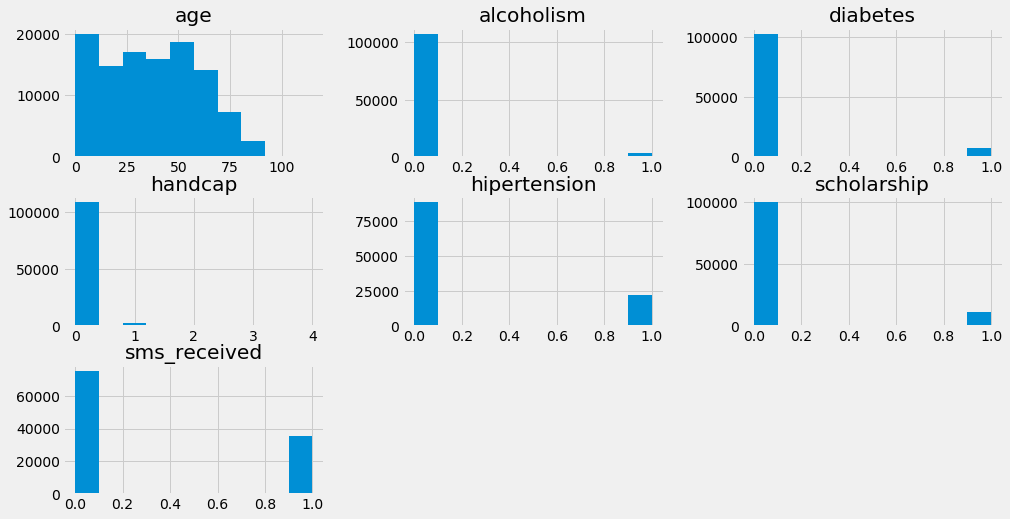

In [13]:
df.hist(figsize=(15,8));

#### Like we see our ages ranging from 0 to 80 approximately and pepole with diabetes,scolarship,handcap and alcoholism have higher effect of attendance rate from rest of factors  

#### Extract hour,day,month and year from scheduledday columns then drop it and appointmentday column because we don't need it anymore

In [14]:
df['hour']=df.scheduledday.dt.hour
df['day']=df.scheduledday.dt.day
df['month']=df.scheduledday.dt.month
df['year']=df.scheduledday.dt.year
df.drop(['scheduledday','appointmentday'],axis=1,inplace=True)

#### Split our data into two sets of data, one for people who showed up and one for people who didn't

In [15]:
df_no_show= df[df['no_show'] == "Yes"]
df_show= df[df['no_show'] == "No"]

#### Getting attendance rate per hour

In [16]:
df_hour_value_counts=df.hour.value_counts().tolist()
df_hour_key_value_counts=df.hour.value_counts().index.tolist()
df_show_hour_value_counts=df_show.hour.value_counts().tolist()
df_show_hour_key_value_counts=df_show.hour.value_counts().index.tolist()
dict_df_hour_value_counts={}
counter=0
for item in df_hour_key_value_counts:
    dict_df_hour_value_counts[item]=df_hour_value_counts[counter]
    counter+=1
dict_df_show_hour_value_counts={}
counter=0
for item in df_hour_key_value_counts:
    dict_df_show_hour_value_counts[item]=df_show_hour_value_counts[counter]
    counter+=1
propotion_of_show_per_hour={}
for i in range(6,22):
    if i in dict_df_hour_value_counts.keys():
        propotion_of_show_per_hour[i]=dict_df_show_hour_value_counts[i]/dict_df_hour_value_counts[i]
    else:
        continue    
print(propotion_of_show_per_hour)     

{6: 0.8079847908745247, 7: 0.8484880029146932, 8: 0.8173051863434975, 9: 0.8030102160180925, 10: 0.7793053545586107, 11: 0.7721578822973293, 12: 0.7792327554407967, 13: 0.7809871624612661, 14: 0.7828421167963187, 15: 0.7681643767793044, 16: 0.7791411042944786, 17: 0.7518047438982468, 18: 0.7873134328358209, 19: 0.7663934426229508, 20: 0.7, 21: 0.6666666666666666}


#### Getting the attendance rate for each month

In [17]:
df_month_value_counts=df.month.value_counts().tolist()
df_month_key_value_counts=df.month.value_counts().index.tolist()
df_show_month_value_counts=df_show.month.value_counts().tolist()
df_show_month_key_value_counts=df_show.month.value_counts().index.tolist()
dict_df_month_value_counts={}
counter=0
for item in df_month_key_value_counts:
    dict_df_month_value_counts[item]=df_month_value_counts[counter]
    counter+=1
dict_df_show_month_value_counts={}
counter=0
for item in df_month_key_value_counts:
    dict_df_show_month_value_counts[item]=df_show_month_value_counts[counter]
    counter+=1
dict_df_no_show_month_value_counts={}
propotion_of_show_per_month={}
for i in range(1,13):
    if i in dict_df_month_value_counts.keys():
        propotion_of_show_per_month[i]=dict_df_show_month_value_counts[i]/dict_df_month_value_counts[i]
    else:
        continue    
print(propotion_of_show_per_month)

{1: 0.7, 2: 0.708185053380783, 3: 0.6690647482014388, 4: 0.6902403409763606, 5: 0.8254401447620178, 6: 0.8991926685577133, 11: 1.0, 12: 0.6885245901639344}


#### Getting the attendance rate for each year

In [18]:
years=np.array(df['year'].value_counts().tolist())
show_years=np.array(df_show['year'].value_counts().tolist())
prop_of_show_in_years=show_years/years
prop_of_show_in_years

array([0.79812428, 0.69354839])

#### visualizeing the attendance rate

#### Certainly, the date of attendance has an effect on whether or not to attend, so we can discover this effect

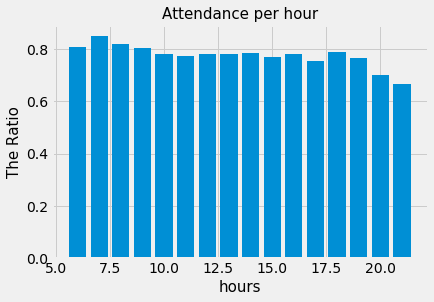

In [19]:
plt.bar(propotion_of_show_per_hour.keys(),propotion_of_show_per_hour.values());
plt.title('Attendance per hour',fontsize=15)
plt.xlabel('hours',fontsize=15)
plt.ylabel('The Ratio',fontsize=15);

#### We note that the attendance rate varies according to the hour, although most of the hours are close, from seventy to eighty percent

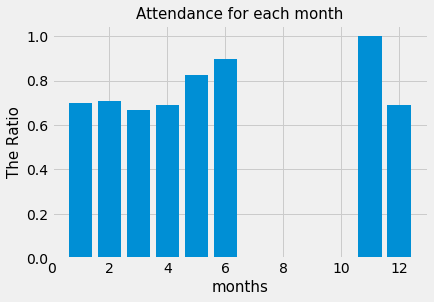

In [20]:
plt.bar(propotion_of_show_per_month.keys(),propotion_of_show_per_month.values());
plt.title('Attendance for each month',fontsize=15)
plt.xlabel('months',fontsize=15)
plt.ylabel('The Ratio',fontsize=15);

#### We note the great discrepancy in the attendance rate according to the month. Months 11, 5 and 6 have a high attendance rate (although the rate of month 11 is somewhat misleading because we only had one patient in this month) compared to months 3 and 4

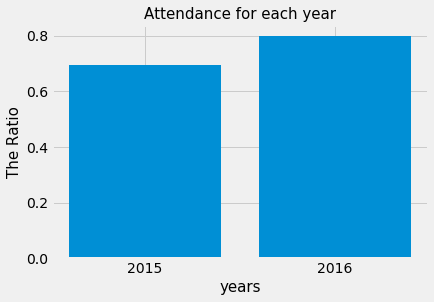

In [21]:
plt.bar(['2016','2015'],prop_of_show_in_years);
plt.title('Attendance for each year',fontsize=15)
plt.xlabel('years',fontsize=15)
plt.ylabel('The Ratio',fontsize=15);

#### From the figure, we see a significant jump in attendance from 2015 to 2016

### Research Question 2  (finding trends among the patients who show and how they differed from the patients who didn't)

#### Show the most ten neighborhoods who have patients already attended 

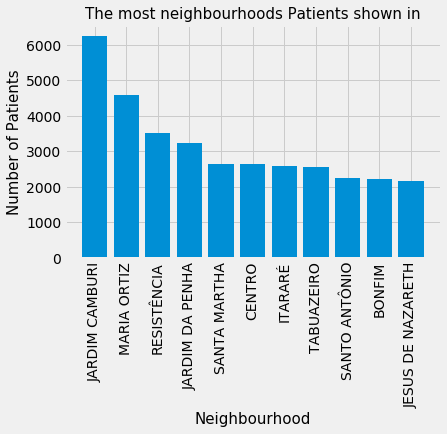

In [22]:
df_neighbourhood=df.neighbourhood.value_counts().tolist()
df_neighbourhood_keys=df.neighbourhood.value_counts().index.tolist()
df_show_neighbourhood=df_show.neighbourhood.value_counts().tolist()
df_show_neighbourhood_keys=df_show.neighbourhood.value_counts().index.tolist()
loc_list=np.arange(0,11)
heights=df_show_neighbourhood[0:11]
labels=df_show_neighbourhood_keys[0:11]
plt.bar(loc_list,heights,tick_label=labels)
plt.xticks(rotation=90);
plt.title('The most neighbourhoods Patients shown in',fontsize=15)
plt.xlabel('Neighbourhood',fontsize=15)
plt.ylabel('Number of Patients',fontsize=15);

#### These neighborhoods have the most number of patients and the most attended, and below we will show the percentage of attendance of each neighborhood separately

#### Obtaining the attendance rate for each neighbourhood

In [23]:
dict_df_neighbourhood={}
counter=0
for neighbourhood in df_neighbourhood_keys:
    dict_df_neighbourhood[neighbourhood]=df_neighbourhood[counter]
    counter+=1
dict_df_show_neighbourhood={}
counter=0
for neighbourhood in df_show_neighbourhood_keys:
    dict_df_show_neighbourhood[neighbourhood]=df_show_neighbourhood[counter]
    counter+=1
prop_of_show_for_each_neighbourhood={}
for neighbourhood in df_show_neighbourhood_keys:
     prop_of_show_for_each_neighbourhood[neighbourhood]=dict_df_show_neighbourhood[neighbourhood]/dict_df_neighbourhood[neighbourhood]
prop_of_show_for_each_neighbourhood_keys=list(prop_of_show_for_each_neighbourhood.keys())
prop_of_show_for_each_neighbourhood_values=list(prop_of_show_for_each_neighbourhood.values())

#### Getting avarage of attendance for neighborhoods

In [24]:
mean(prop_of_show_for_each_neighbourhood_values)

0.8045042771157639

#### Display the attendance rate for  most ten neighborhoods who have patients already attended

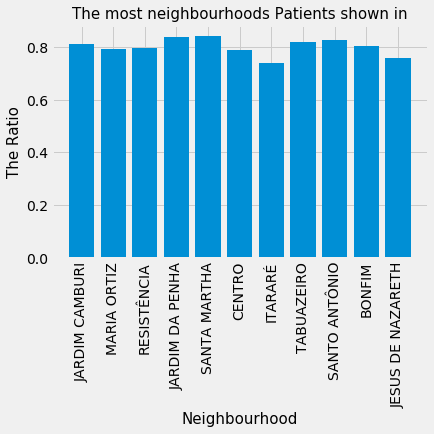

In [25]:
loc_list=np.arange(0,11)
heights=prop_of_show_for_each_neighbourhood_values[0:11]
labels=prop_of_show_for_each_neighbourhood_keys[0:11]
plt.bar(loc_list,heights,tick_label=labels)
plt.xticks(rotation=90);
plt.title('The most neighbourhoods Patients shown in',fontsize=15)
plt.xlabel('Neighbourhood',fontsize=15)
plt.ylabel('The Ratio',fontsize=15);

#### The attendance rate in all neighborhoods is close, with an average of eighty percent for each neighborhood Here we have some neighborhoods and their ratios of attendance

#### Obtaining the attendance rate for each age

In [26]:
df_age=df.age.value_counts().tolist()
df_age_keys=df.age.value_counts().index.tolist()
df_show_age=df_show.age.value_counts().tolist()
df_show_age_keys=df_show.age.value_counts().index.tolist()
dict_df_age={}
counter=0
for year in df_age_keys:
    dict_df_age[year]=df_age[counter]
    counter+=1
dict_df_show_age={}
counter=0
for year in df_show_age_keys:
    dict_df_show_age[year]=df_show_age[counter]
    counter+=1
prop_of_show_for_each_age={}
for year in df_show_age_keys:
     prop_of_show_for_each_age[year]=dict_df_show_age[year]/dict_df_age[year]

#### Age factor plays a big role in the disease. Let's see our most repeated ages

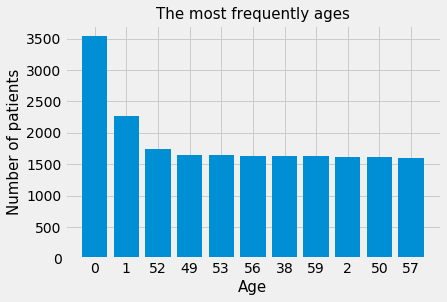

In [27]:
loc_list=np.arange(0,11)
height=df_age[0:11]
labels=df_age_keys[0:11]
plt.bar(loc_list,height,tick_label=labels)
plt.title('The most frequently ages',fontsize=15)
plt.xlabel('Age',fontsize=15)
plt.ylabel('Number of patients',fontsize=15);

#### We note that the largest proportion of patients are children and the elderly, and this is logical

#### If you want to see the precentage of attendance for each age here is a dictionary

In [28]:
prop_of_show_for_each_age

{0: 0.8194405199208816,
 1: 0.8174219093708754,
 52: 0.8298969072164949,
 56: 0.8391437308868501,
 2: 0.8442521631644005,
 59: 0.8355911330049262,
 49: 0.8196125907990315,
 53: 0.8067837674136886,
 57: 0.8265751715533375,
 50: 0.819590824550527,
 38: 0.8035604665438919,
 51: 0.8194001276324187,
 54: 0.8248366013071895,
 3: 0.8169200264375414,
 36: 0.7822784810126582,
 58: 0.8277739959155889,
 37: 0.7932159165035877,
 6: 0.7922419460881,
 34: 0.7889908256880734,
 45: 0.8245010323468686,
 39: 0.7786458333333334,
 63: 0.8697234352256187,
 46: 0.8061643835616439,
 33: 0.7716535433070866,
 60: 0.8327427356484762,
 32: 0.7800664451827243,
 5: 0.7850906648757555,
 55: 0.8196491228070175,
 44: 0.7827841291190316,
 30: 0.757396449704142,
 19: 0.7449838187702266,
 64: 0.8632607062359129,
 61: 0.8510796723752793,
 18: 0.7646267652992602,
 48: 0.806290207290922,
 47: 0.8084648493543759,
 7: 0.7890679747722494,
 31: 0.7776233495482975,
 28: 0.7707182320441989,
 17: 0.7375745526838966,
 8: 0.7766853

#### Here is the maximum precentages of attendance by age

In [29]:
the_most_precentages_show_years= dict(sorted(prop_of_show_for_each_age.items(), key = itemgetter(1), reverse = True)[:11])
the_most_precentages_show_years

{100: 1.0,
 102: 1.0,
 99: 1.0,
 96: 0.9411764705882353,
 88: 0.9047619047619048,
 84: 0.887459807073955,
 70: 0.8701657458563536,
 63: 0.8697234352256187,
 73: 0.8675862068965517,
 64: 0.8632607062359129,
 69: 0.8581730769230769}

#### Here is the minimum precentages of attendance by age

In [30]:
the_lowest_precentages_show_years=dict(sorted(prop_of_show_for_each_age.items(), key = itemgetter(1), reverse = True)[-10:])
the_lowest_precentages_show_years

{19: 0.7449838187702266,
 22: 0.7449127906976745,
 24: 0.7415458937198067,
 17: 0.7375745526838966,
 25: 0.7357357357357357,
 9: 0.7346938775510204,
 15: 0.7341040462427746,
 13: 0.7252946509519492,
 14: 0.7173524150268337,
 115: 0.4}

#### Is age an obstacle to attending or not? let's explor by plotting the maximum and minimum precentages of attendance by age

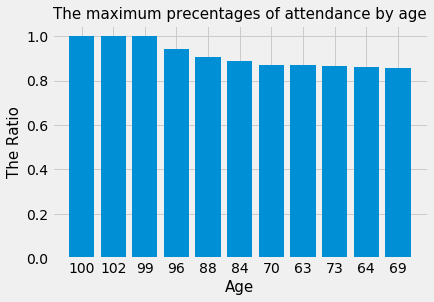

In [31]:
loc_list=np.arange(0,11)
height=list(the_most_precentages_show_years.values())
labels=list(the_most_precentages_show_years.keys())
plt.bar(loc_list,height,tick_label=labels)
plt.title('The maximum precentages of attendance by age',fontsize=15)
plt.xlabel('Age',fontsize=15)
plt.ylabel('The Ratio',fontsize=15);

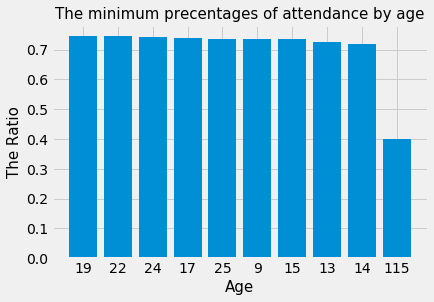

In [32]:
loc_list=np.arange(0,10)
height=list(the_lowest_precentages_show_years.values())
labels=list(the_lowest_precentages_show_years.keys())
plt.bar(loc_list,height,tick_label=labels)
plt.title('The minimum precentages of attendance by age',fontsize=15)
plt.xlabel('Age',fontsize=15)
plt.ylabel('The Ratio',fontsize=15);

#### We note that attendance rates vary according to age..the elderly have higher attendance rates than young people. I think this is interesting

#### Does gender have an effect on whether patients attend or not?

In [36]:
#Function to get proportion of each gender 
def gender_proportion(letter,gender_name):
    df_gender=df[df['gender']==letter].count().sum()
    df_show_gender=df_show[df_show['gender']==letter].count().sum()
    df_no_show_gender=df_no_show[df_no_show['gender']==letter].count().sum()
    prop_of_show=df_show_gender/df_gender
    prop_of_no_show=1-prop_of_show
    prop_of_gender=[prop_of_show*100,prop_of_no_show*100]
    labels=['show','no show']
    plt.pie(prop_of_gender,labels=labels,autopct='%1.1f%%',wedgeprops={'edgecolor':'black'});
    plt.title('Proportion of {} who shown'.format(gender_name));

#### Display Ratio of females who attended to those who did not

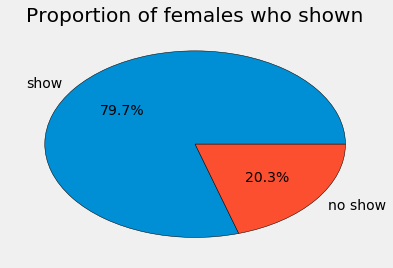

In [37]:
gender_proportion('F','females')

#### Display Ratio of males who attended to those who did not

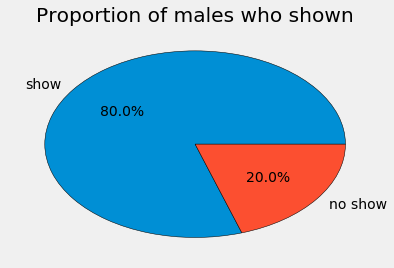

In [38]:
gender_proportion('M','males')

### We note that the attendance rate is similar between men and women, although it is slightly more for men

In [39]:
#finction to get ratio of show to some factors 
def ratio_of_show(column):
    df_column=df[df[column]!=0].count().sum()
    df_show_column=df_show[df_show[column]!=0].count().sum()
    df_no_show_column=df_no_show[df_no_show[column]!=0].count().sum()
    prop_of_show=df_show_column/df_column
    prop_of_no_show=1-prop_of_show
    prop=[prop_of_show*100,prop_of_no_show*100]
    labels=['show','no show']
    plt.pie(prop,labels=labels,autopct='%1.1f%%',wedgeprops={'edgecolor':'black'});
    plt.title('Proportion of pepole with {}'.format(column));

#### I think scholarship one of the factors that makes the most difference.. so let's display Ratio of pepole with scholarship who attended to those who did not

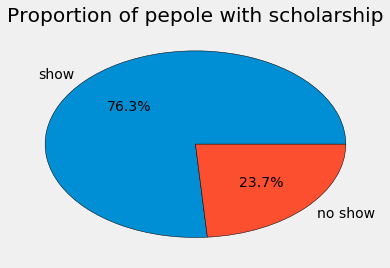

In [40]:
ratio_of_show('scholarship')

#### Well,scholarship may not had the greatest impact on the number of attendees or not, but still had a percentage of more than seventy-five percent of those with the scholarship who attended.

#### I think that the role of the disease and the degree of its severity plays a big role in the rate of attendance or not, and therefore we will review the attendance rates for each disease separately.

#### Display Ratio of pepole with handcap who attended to those who did not

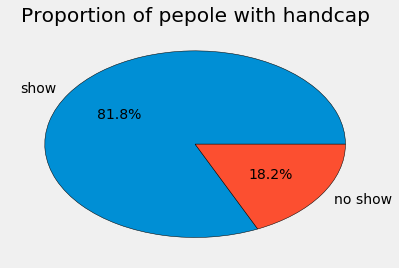

In [41]:
ratio_of_show('handcap')

#### We see a high attendance rate of more than 80% 

#### Display Ratio of pepole with hipertension who attended to those who did not

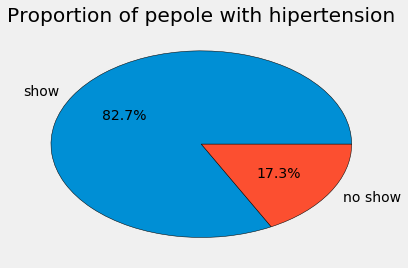

In [42]:
ratio_of_show('hipertension')

#### Hipertension has the highest attendance rate that we have now compared to the rest of the percentages

#### Display Ratio of pepole with diabetes who attended to those who did not

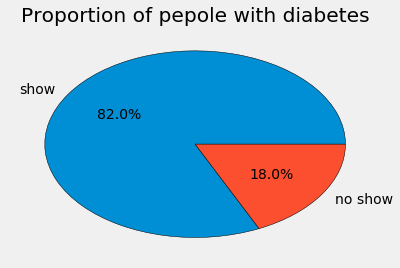

In [43]:
ratio_of_show('diabetes')

#### Again, we see a high attendance rate.. Eighty-two percent

#### Now we have a critical factor (alcoholism) I am very curious to see the effect of this factor...let's  display ratio of pepole with alcoholism who attended to those who did not

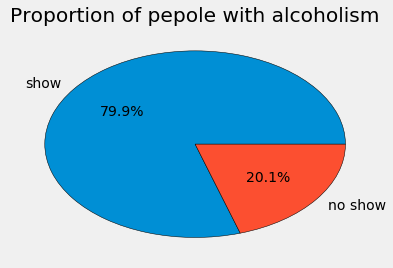

In [44]:
ratio_of_show('alcoholism')

#### Well, we saw one of the most common percentages again, up to eighty percent

#### Maybe some people didn't remember their date and that was the reason for not attending Let's explore this through this factor(sms_received)

#### Display Ratio of pepole with sms_received who attended to those who did not

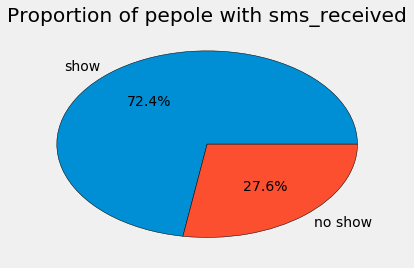

In [45]:
ratio_of_show('sms_received')

#### The no-show rate for those who received a SMS is still high, exceeding twenty-five percent

#### Age is a factor that has its impact, and the hour of attendance too, so what about their impact together?

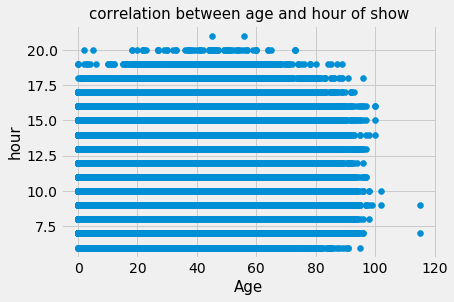

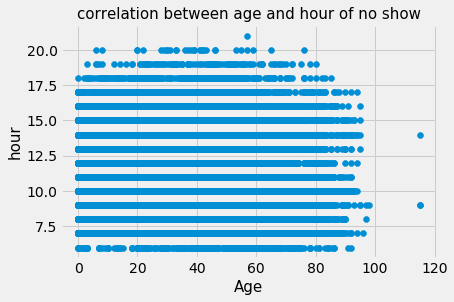

In [46]:
plt.scatter(df_show.age,df_show.hour)
plt.title('correlation between age and hour of show',fontsize=15)
plt.xlabel('Age',fontsize=15)
plt.ylabel('hour',fontsize=15);
plt.show()
plt.scatter(df_no_show.age,df_no_show.hour)
plt.title('correlation between age and hour of no show',fontsize=15)
plt.xlabel('Age',fontsize=15)
plt.ylabel('hour',fontsize=15);
plt.show()

#### We see that the relationship of age and time with attendance or not is very slight, so let's explore more

#### Is the month in which the patient attends related to age?

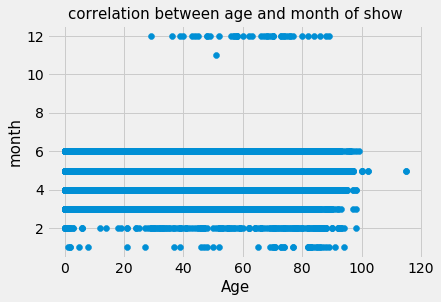

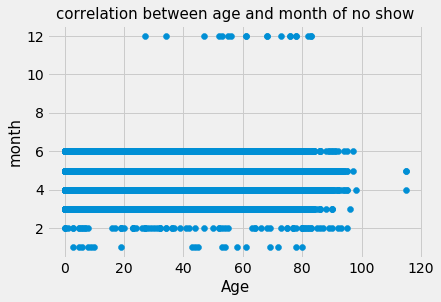

In [47]:
plt.scatter(df_show.age,df_show.month)
plt.title('correlation between age and month of show',fontsize=15)
plt.xlabel('Age',fontsize=15)
plt.ylabel('month',fontsize=15);
plt.show()
plt.scatter(df_no_show.age,df_no_show.month)
plt.title('correlation between age and month of no show',fontsize=15)
plt.xlabel('Age',fontsize=15)
plt.ylabel('month',fontsize=15);
plt.show()

#### As we saw some months have a lower number of no-shows than others, such as the first, second, and twelfth months

#### Summary statistics for pepole who show

In [48]:
df_show.describe()

,age,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,hour,day,month,year
count,88207.000000,88207.000000,88207.000000,88207.000000,88207.000000,88207.000000,88207.000000,88207.000000,88207.000000,88207.000000,88207.000000
mean,37.790504,0.093904,0.204394,0.073838,0.030417,0.022742,0.291337,10.676352,14.033455,4.881778,2015.999513
std,23.338645,0.291697,0.403261,0.261508,0.171733,0.162751,0.454381,3.207967,9.357300,0.696983,0.022074
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,1.000000,1.000000,2015.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,6.000000,5.000000,2016.000000
50%,38.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,12.000000,5.000000,2016.000000
75%,56.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,13.000000,20.000000,5.000000,2016.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,21.000000,31.000000,12.000000,2016.000000


#### Summary statistics for pepole who didn't show

In [49]:
df_no_show.describe()

,age,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,hour,day,month,year
count,22319.000000,22319.000000,22319.000000,22319.000000,22319.000000,22319.000000,22319.000000,22319.000000,22319.000000,22319.000000,22319.000000
mean,34.317667,0.115507,0.169004,0.064071,0.030333,0.020297,0.438371,11.162597,15.117210,4.594964,2015.999149
std,21.965941,0.319640,0.374764,0.244885,0.171505,0.156670,0.496198,3.219395,9.249078,0.742814,0.029165
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,1.000000,1.000000,2015.000000
25%,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,6.000000,4.000000,2016.000000
50%,33.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.000000,15.000000,5.000000,2016.000000
75%,51.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,14.000000,25.000000,5.000000,2016.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,21.000000,31.000000,12.000000,2016.000000


<a id='conclusions'></a>
## Conclusions

Finally,We have reached these results:
* The scheduled date of attendance has a significant impact on the number of attendance (hour-month-year).
* The age factor has a significant role in the attendance rate.
* The attendance rate of men and women is almost equal, but the number of women, whether in attendance or not, is more.
* The attendance rate in all neighborhoods is fairly similar.
* People who have a scholarship have a high no-show rate.
* The attendance rate varies according to the disease. Patients with hipertension, diabetes and people with handcap have a higher attendance rate than alcoholics.
* sms_received from patients is one of the least influential factors compared to the rest

<a id='limitations'></a>
## limitations 
* The size of our data was acceptable, but most of the ratios of the factors were close, which raises doubts whether the data was sufficient or not
* plotting all ratios to all neighborhoods in one figure was messy but the ratios were close so we plot maximum and minmum ratios
* The statistical approach was not perfect due to the characteristics of the data set
* Some factors are missing that would have had a significant impact on the results such as educational level

In [47]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0